Pankajan .T
190428D

In [18]:
import cv2 as cv
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [19]:
def CirParameters(data):
    part1 = data[0]
    part2 = data[1]
    part3 = data[2]
    A = np.array([[part2[0] - part1[0], part2[1] - part1[1]], [part3[0] - part2[0], part3[1] - part2[1]]]) 
    B = np.array([[part2[0]**2 - part1[0]**2 + part2[1]**2 - part1[1]**2], [part3[0]**2 - part2[0]**2 + part3[1]**2 - part2[1]**2]])		
    inv_A = inv(A)
    a, b = np.dot(inv_A, B) / 2
    a, b = a[0], b[0]
    r = np.sqrt((a - part1[0])**2 + (b - part1[1])**2)

    return (a, b, r)

In [20]:
def RandPoints(data, i):
    count = 0
    res = []
    while count < i:
        index = np.random.randint(len(data))
        X = data[index][0]
        Y = data[index][1]
        if (X, Y) not in res:
            res.append((x, y))
            count += 1

    return res

In [21]:
def InlierDist(cir, data, lim):
    x_data = data[:, 0]
    y_data = data[:, 1]
    a = cir[0]
    b = cir[1]
    r = cir[2]
    total = 0
    inliers = []
    for i in range(len(x_data)):
        distance = np.sqrt((x_data[i] - a)**2 + (y_data[i] - b)**2)

        if abs(distance - r) <= lim:
            inliers.append([x_data[i], y_data[i]])
            total += abs(distance - r)
    
    return inliers, total

In [22]:

# np . random . see ( 0 )
N = 100
half_n = N//2
R = 10
s = R/16
t = np.random.uniform(0, 2*np.pi ,half_n)
n = s*np.random.randn(half_n)
x ,y = (R + n)*np.cos(t), (R + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n , 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

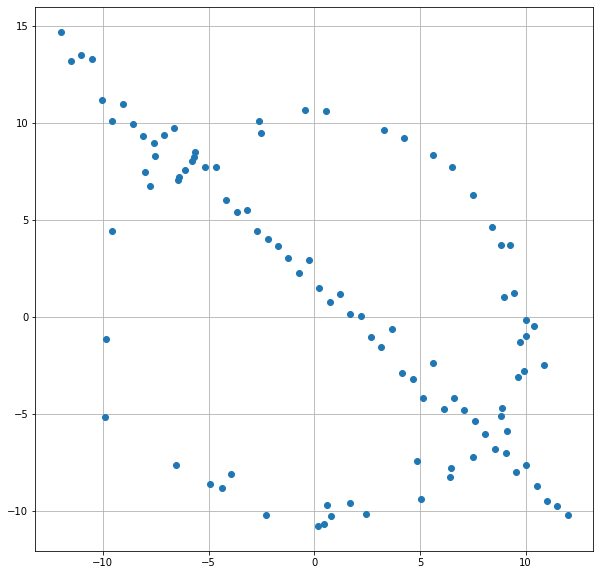

In [23]:
#1
from matplotlib.patches import Circle


fig, ax = plt.subplots(figsize=(10,10))
ax.plot(X[:,0], X[:, 1], 'o', label='Outliers')
ax.grid(True)

x_data = X[:, 0]
y_data = X[:, 1]
iterations = 35
inlier_threshold = R/8
inlier_count_threshold = 50
best_model = [0, 0, 999999, []]
for i in range(iterations):
    sample = RandPoints(X, 3)
    initial_circle = CirParameters(sample)
    if abs(R - initial_circle[2]) > 1.5*R:
        continue
    inliers, toal_distance = InlierDist(initial_circle, X, inlier_threshold)
    if len(inliers) < inlier_count_threshold:
        continue
    inlier_sample = RandPoints(inliers, 3)
    circle = CirParameters(inlier_sample)
    inliers, toal_distance = InlierDist(circle, X, inlier_threshold)
    if len(inliers) < inlier_count_threshold:
        continue
    if len(best_model[-1]) < len(inliers):
        best_model = [circle, initial_circle, sample, toal_distance, inliers]
    elif len(best_model[-1]) == len(inliers):
        if best_model[3] > toal_distance:
            best_model = [circle, initial_circle, sample, toal_distance, inliers]
if len(best_model[-1]) == 0:
    print("Any better model not found")
else:
    inliers = np.array(best_model[-1])
    ax.plot(inliers[:, 0], inliers[:, 1], 'o', label='Inliers')

    best_samples = np.array(best_model[2])
    ax.plot(best_samples[:,0], best_samples[:, 1], 'o', label='Best samples')

    a, b, r = best_model[0][0], best_model[0][1], best_model[0][2]
    circle = Circle((a, b), radius=r, color='r', fc='y', fill=False, label='RANSAC')
    ax.add_patch(circle)

    a, b, r = best_model[1][0], best_model[1][1], best_model[1][2]
    init_circle = Circle((a, b), radius=r, color='b', fc='y', fill=False, label='Circle estimated from best sample')
    ax.add_patch(init_circle)

ax.legend();

In [24]:
def click_clacl(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, ' ', y)



In [25]:
def superimpose(im_src, im_dst, pts_src, pts_dst):
    h, status = cv.findHomography(pts_src, pts_dst)
    im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1], im_dst.shape[0]))
    return cv.add(im_out, im_dst)

(340, 572, 3)
(800, 1600, 3)


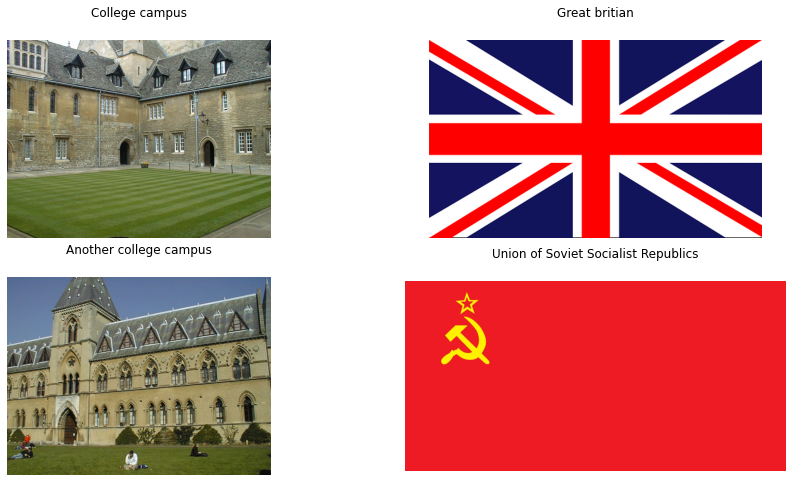

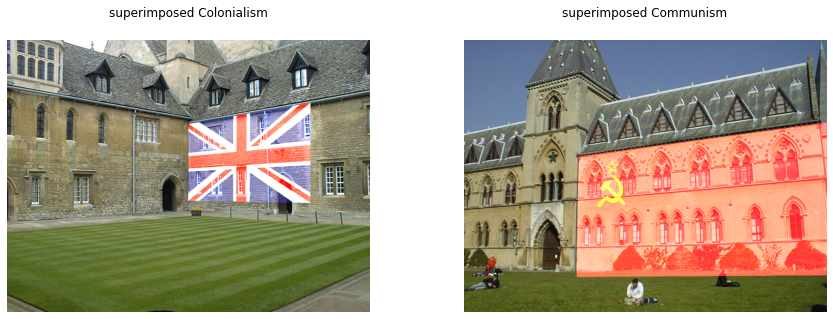

In [42]:
dst1 = cv.imread(r'1.jpg',cv.IMREAD_COLOR)
assert dst1 is not None
src1 = cv.imread(r'union-jack-26119__340.png',cv.IMREAD_ANYCOLOR)
assert src1 is not None
dst2 = cv.imread(r'001.jpg',cv.IMREAD_COLOR)
assert dst2 is not None
src2 = cv.imread(r'Flag-Union-of-Soviet-Socialist-Republics.png',cv.IMREAD_ANYCOLOR)
assert src2 is not None
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
ax[0, 0].imshow(cv.cvtColor(dst1, cv.COLOR_BGR2RGB))
ax[0, 0].title.set_text('College campus')
ax[0, 0].axis('off')
ax[0, 0].xaxis.tick_top()
ax[0, 1].imshow(cv.cvtColor(src1, cv.COLOR_BGR2RGB))
ax[0, 1].title.set_text('Great britian')
ax[0, 1].axis('off')
ax[0, 1].xaxis.tick_top()
ax[1, 0].imshow(cv.cvtColor(dst2, cv.COLOR_BGR2RGB))
ax[1, 0].title.set_text('Another college campus')
ax[1, 0].axis('off')
ax[1, 0].xaxis.tick_top()
ax[1, 1].imshow(cv.cvtColor(src2, cv.COLOR_BGR2RGB))
ax[1, 1].title.set_text('Union of Soviet Socialist Republics')
ax[1, 1].axis('off')
ax[1, 1].xaxis.tick_top()
cv.imshow('image', dst1)
cv.setMouseCallback('image', click_clacl)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imshow('image', dst2)
cv.setMouseCallback('image', click_clacl)
cv.waitKey(0)
cv.destroyAllWindows()
pts_dst1 = np.array([[512, 237], [1022, 148], [1022, 502], [511, 480]])
pts_dst2 = np.array([[323, 328], [1002, 235],  [1022, 643], [318, 652]])
print(src1.shape)
print(src2.shape)
pts_src1 = np.array([[0, 0], [762, 0], [762, 381], [0, 381]])
pts_src2 = np.array([[0, 0], [1524, 0], [1524, 762], [0, 762]])
superimposed1 = superimpose(src1, dst1, pts_src1, pts_dst1)
superimposed2 = superimpose(src2, dst2, pts_src2, pts_dst2)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(cv.cvtColor(superimposed1, cv.COLOR_BGR2RGB))
ax[0].title.set_text('superimposed Colonialism')
ax[0].axis('off')
ax[0].xaxis.tick_top()
ax[1].imshow(cv.cvtColor(superimposed2, cv.COLOR_BGR2RGB))
ax[1].title.set_text('superimposed Communism')
ax[1].axis('off')
ax[1].xaxis.tick_top()

In [ ]:
def Homogrpahy(src_img, dst_img):
    sift = cv.SIFT_create()
    kp1, des1 = sift.detectAndCompute(src_img, None)
    kp2, des2 = sift.detectAndCompute(dst_img, None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)  
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k = 2)
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 0.95)
    return H

In [ ]:
def match(img1, img2):
    sift = cv.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)  
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k = 2)
    matchesMask = [[0,0] for i in range(len(matches))]
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i] = [1,0]
    draw_params = dict(matchColor = (0, 255, 0),
                    singlePointColor = (255, 0, 0),
                    matchesMask = matchesMask,
                    flags = cv.DrawMatchesFlags_DEFAULT)               
    img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.imshow(img3, cmap = 'gray', vmin = 0, vmax = 255)
    ax.title.set_text('Matched Features')
    ax.axis('off')
    ax.xaxis.tick_top()

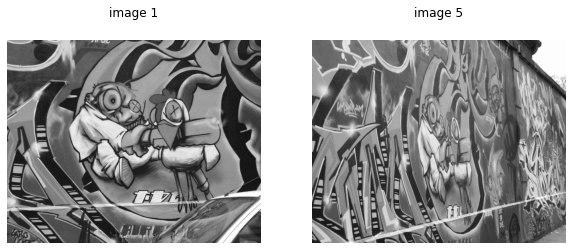

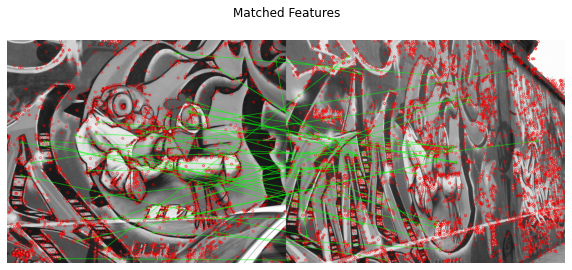

In [ ]:
img1 = cv.imread(r'img1.ppm', cv.IMREAD_GRAYSCALE)
assert img1 is not None
img5 = cv.imread(r'img5.ppm', cv.IMREAD_GRAYSCALE)
assert img5 is not None
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img1, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].title.set_text('image 1')
ax[0].axis('off')
ax[0].xaxis.tick_top()
ax[1].imshow(img5, cmap = 'gray', vmin =0, vmax=255)
ax[1].title.set_text('image 5')
ax[1].axis('off')
ax[1].xaxis.tick_top()
match(img1, img5)

In [ ]:
I = np.identity(3)
for i in range(4):
    src_name = str(i + 1)+'.ppm'
    src_img = cv.imread(r'img'+src_name, cv.IMREAD_GRAYSCALE)
    assert src_img is not None
    dst_name = str(i + 2)+'.ppm'
    dst_img = cv.imread(r'img'+dst_name, cv.IMREAD_GRAYSCALE)
    assert dst_img is not None
    I = np.matmul(Homogrpahy(src_img, dst_img), I)

print("homography using own code \n")
print(I)

homography using own code 

[[ 6.07414817e-01  4.67164067e-02  2.23595879e+02]
 [ 2.13175798e-01  1.13583635e+00 -2.11945486e+01]
 [ 4.69568161e-04 -6.19224890e-05  9.93988489e-01]]


  Homography of dataset
  
   6.2544644e-01,    5.7759174e-02,    2.2201217e+02

   2.2240536e-01,    1.1652147e+00,   -2.5605611e+01
   
   4.9212545e-04,  -3.6542424e-05,    1.0000000e+00


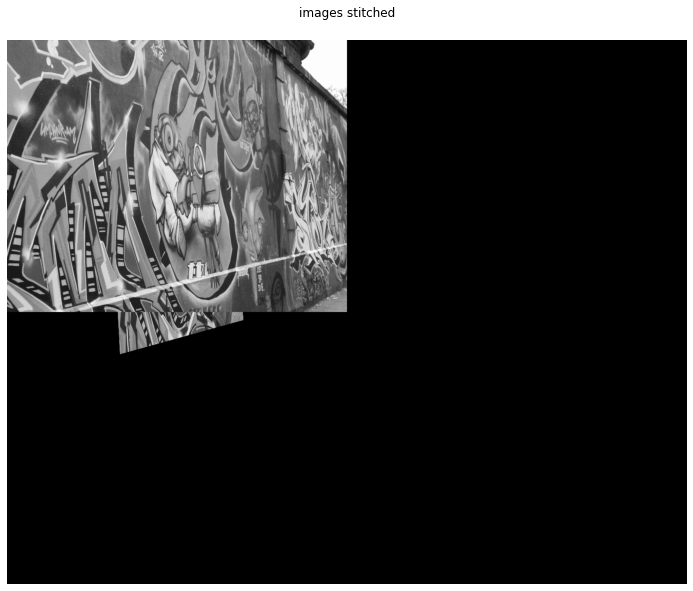

In [ ]:
dst = cv.warpPerspective(src_img, I, (dst_img.shape[1] + src_img.shape[1], dst_img.shape[0] + src_img.shape[0])) 
dst[0:dst_img.shape[0], 0:dst_img.shape[1]] = dst_img
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(dst, cmap = 'gray', vmin = 0, vmax = 255)
ax.title.set_text('images stitched')
ax.axis('off')
ax.xaxis.tick_top()